# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [5]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Simulations

In [6]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

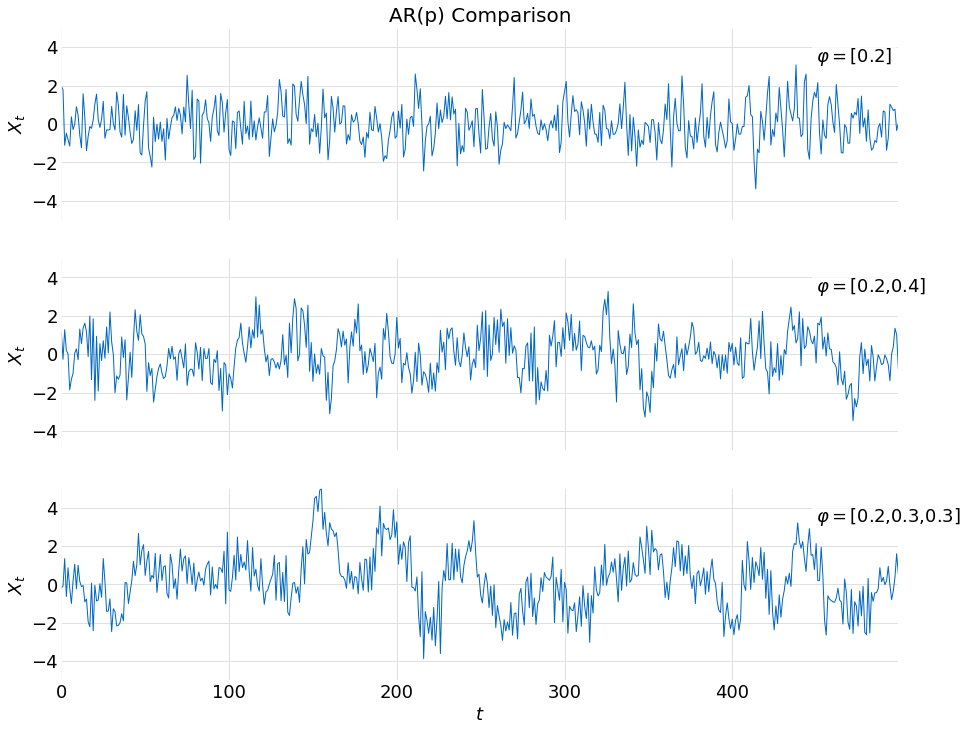

In [7]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = numpy.array([ar1[:500], ar2[:500], ar3[:500]])
plots.time_series_stack(samples, [-5.0, 5.0], labels, title)

## Estimation of $\text{AR}(p)$ Parameters

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1)

The parameter used in the $\text{AR}(p)$ simulation is $\varphi = 0.2$

In [8]:
arima.yw(ar1, 1)

array([0.20734661])

In [9]:
result = arima.ar_estimate(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20743662]),
 array([0.01252007, 0.00979813, 0.01394208]))

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14111.473
Date:                Sat, 19 Mar 2022   AIC                          28228.945
Time:                        14:00:02   BIC                          28250.576
Sample:                             0   HQIC                         28236.267
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0037      0.013     -0.293      0.769      -0.028       0.021
ar.L1          0.2074      0.010     21.171      0.000       0.188       0.227
sigma2         0.9845      0.014     70.615      0.000       0.957       1.012
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.67   Prob(JB):                         0.59
Heteroskedasticity (H):               0.99   Skew:                             0.03
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2)
The parameters used in the $\text{AR}(p)$ simulation is $\varphi = [0.2, 0.4]$

In [11]:
arima.yw(ar2, 2)

array([0.20100456, 0.39187456])

In [12]:
result = arima.ar_estimate(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20095043, -0.39195688]),
 array([0.02447325, 0.00932504, 0.00914525, 0.01411294]))

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14154.068
Date:                Sat, 19 Mar 2022   AIC                          28316.136
Time:                        14:00:02   BIC                          28344.977
Sample:                             0   HQIC                         28325.898
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0128      0.024      0.524      0.601      -0.035       0.061
ar.L1          0.2010      0.009     21.550      0.000       0.183       0.219
ar.L2          0.3920      0.009     42.859      0.000       0.374       0.410
sigma2         0.9929      0.014     70.352      0.000       0.965       1.021
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.68   Prob(JB):                         0.93
Heteroskedasticity (H):               1.05   Skew:                            -0.00
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3)
The parameters used in the $\text{AR}(p)$ simulation is $\varphi = [0.2, 0.3, 0.3]$

In [14]:
arima.yw(ar3, 3)

array([0.20437549, 0.29445915, 0.29325744])

In [15]:
result = arima.ar_estimate(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20428192, -0.29465744, -0.29347154]),
 array([0.04756129, 0.00962161, 0.00940675, 0.00963681, 0.01378246]))

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14058.406
Date:                Sat, 19 Mar 2022   AIC                          28126.812
Time:                        14:00:03   BIC                          28162.864
Sample:                             0   HQIC                         28139.015
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0691      0.048      1.452      0.146      -0.024       0.162
ar.L1          0.2043      0.010     21.232      0.000       0.185       0.223
ar.L2          0.2947      0.009     31.324      0.000       0.276       0.313
ar.L3          0.2935      0.010     30.453      0.000       0.275       0.312
sigma2         0.9741      0.014     70.674      0.000       0.947       1.001
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.81   Prob(JB):                         0.56
Heteroskedasticity (H):               0.98   Skew:                             0.03
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""